# Using the information bottleneck to identify tradeoffs between complexity and accuracy in human decision-making

### April 21st, 2020


The goal of this notebook is to start organizing some of the ideas we've been working on using the information bottleneck to study tradeoffs between how much information people encode (complexity) and how effectively they use this information to make decisions (accuracy).

This notebook highlights:

0. <a href=#bookmark0>Motivations for using the information bottleneck</a>
1. <a href=#bookmark1>Adapting the information bottleneck to human decision-making tasks</a>
2. <a href=#bookmark2>Adaptations of the information bottleneck to human decision-making tasks</a>
3. <a href=#bookmark3>The information bottleneck in simplified environments</a>

### 0) Motivation: How do we measure the optimality of human decision-making?<a name='bookmark0' />

To make effective decisions, humans need to use information from the past to build predictive "mental models" of the world. However, we have limited cognitive resources to learn from and encode information from our environment. These limitations require the ability to filter past information, to focus on the parts of the past that are most relevant for prediction, and discard inforamtion that is irrelevant.

There is a lot of interest in psychology/neuroscience in assessing how optimally humans and animals manage the tradeoff between encoding and accuracy. This is typically done by assessing the "optimality" of agent decisions. A typical metric of optimality compares an agent's performance with some ideal observer 'oracle' (e.g., Bayes-optimal solution for the task). An agent's optimality can then be measured as differences between subject and oracle performance, with deviations from the oracle identifying the level of sub-optimality.

While this is a reasonable metric for optimality, it ignores an important contraint: agents rarely possess the computational or encoding resources to implement ideal observer solutions (especially in high dimensional environments). This somewhat changes the nature of the problem the subjects are solving: rather than trying to optimize learning at all costs, learning may instead be optimized within the the subject's resource constraints. This is not a novel concept in human decision-making: the field of bounded rationality (and people like Herbert Simon and Gerd Gigerenzer) attempts to identify tradeoffs between accuracy and resource constraints (justifying heuristics as being suboptimal in an oracle sense, but optimal given resouce contraints).

This idea proposes something interesting for human decision-making: there is not *one* optimal strategy or solution for any learning or decision-making scenario, but *many* optimal strategies, which depend on the resources and agent uses, or wants to use to engage in learning. But how do we measure the resources being applied to a task? And how do we measure how effective people are using these resources? These are ultimately hard questions to answer because it's tough to know what beliefs/strategies/mental models people are using to perform a task. Furthermore, it could also be difficult to determine what the optimal 'oracle' model should be for different levels of resource use.

The following seeks to address this problem using the information bottleneck method. The inforamtion bottleneck uses information theoretic tools to assess properties of different statistical models, such as the amount of information the model is encoding, the model's predictive accuracy, and how optimally this statistical model performs this encoding/accuracy tradeoff. Importantly, these methods are non-parametric and allow the measure of model properties that don't require explicit knowledge of the model's functional form. This therefore seems like the appropriate framework with which to study tradeoffs in human decision-making. 

This notebook will outline how this method can be applied to measure three properties of human mental-models during decision-making tasks: 1) the amount of information a mental model encodes, 2) the accuracy with which this mental model, and 3) how optimally subjects are performing this tradeoff. The advantage of information theoretic tools is that they are inherently non-parametric, requiring no explicit assumtions about the functional form of the decision-strategies being used.

### 1) Adapting the information bottleneck to human decision-making tasks<a name='bookmark1' />

The problem of building effective mental models can be cast as a problem of "lossy compression": given certain encoding limitations, agents try to compress past information from their environment into mental models that they use to interact with the world. The challenge presented earlier is that knowing the functional form of this compression requires knowing the mental model the agent has formed, something we do not have explicit access to. Furthermore, knowing how effectively this model is using its compressed information is also challenging as it requires knowing the optimal oracle for every given level of compression.

The information bottleneck framework offers solutions to both of these problems. This section will go over the information bottleneck method and how it can be applied to human decision-making.

#### 1.1) The information bottleneck method

The goal of the information bottleneck method is to find the best tradeoffs between compression $\hat{X}$ of one random variable $X$ to predict another $Y$ given their joint distribution $p(X,Y)$. This compression can be obtained by solving the following equation:

$$L[p(\hat{X}|X)]=I(X;\hat{X})-\beta I(\hat{X};Y)$$

where $I(;)$ indicates the mutual information, $L[p(\hat{X}|X)]$ indicates the quatitity to be minimized, and $\beta$ is a Lagrange multiplier. Here, $I(X;\hat{X})$ corresponds to the amount of information our compression $\hat{X}$ retains about $X$, and $\beta I(\hat{X};Y)$ corresponds to the information we want to preserve about $Y$. The Lagrange multiplier $\beta$ controls the amount of information we want to preserve about $Y$. Solving this equation for a range of values of $\beta$, we obtain an information bottleneck curve that tells us the minimum compression we will need to obtain different levels of information about $Y$. When $\beta \rightarrow 0$, none of the past needs to be retained (since we don't need to retain any information about $Y$). Conversely, $\beta \rightarrow \infty$ implies that all of the past is being retained (i.e., no compression), and the curve saturates at $I(X;Y)$.

Typically, the equations above are hard to solve analytically. However, a numerical solution, used in rate distortion theory, can be obtained using the Blahut-Arimoto algorithm. For a source $X$, this algorithm converges on an optimal compression $\hat{X}$ that minimizes the source's distortion $d(X,\hat{X})$ using the joint distribution $p(X,\hat{X})$. It is implemented by iterating between these two equations until convergence:

$$p_{t+1}(\hat{X})=\sum_{x \in X}{p_t(x)p_t(\hat{x}|x)}$$

$$p_{t+1}(\hat{X}|X)=\frac{p_t(\hat{x})\exp(-\beta d_t(x,\hat{X}))}{\sum_{\hat{x} \in \hat{X}}{p_t(\hat{x})\exp(-\beta d_t(x,\hat{x}))}}$$

where $\beta$ indicates the targeted slope in the rate distortion curve (i.e., the amount of distortion we are willing to accept in our signal).

In the context of the information bottleneck, $\beta$ has a similar function, indcating the amount of the variable $X$ we would need to retain a certain amount of inforamtion about $Y$. Tishby and colleagues demonstrate that the distortion $d(x,\hat{x})$ is equivalent to $D_{KL}[p(Y|X)\| p(Y|\hat{X})]$, where $D_{KL}$ is the KL divergence. Therefore, in order to obtain the minimum $p(\hat{X}|X)$ that maximizes $\beta I(\hat{X};Y)$ for a given value $\beta$, we can iterate through the following equations

$$p(\hat{X}|X) = \frac{p(\hat{X})}{Z(X,\beta)}\exp\Big[-\beta\sum_{y \in Y}{p(y|X)\log\frac{p(y|X)}{p(y|\hat{X})}}\Big]$$

where $Z(X,\beta)$ represents the normalizing factor $Z(X,\beta) = \sum_{\hat{x} \in \hat{X}}{p(\hat{x}) \exp \Big[\sum_{y \in Y}{p(y|x) \log \frac{p(y|x)}{p(y|\hat{x})}}\Big]}$,

$$p(Y|\hat{X}) = \frac{1}{p(\hat{x})} \sum_{x \in X}{p(y|x)p(\hat{x}|x)p(x)}$$

to ensure the markovian relation $\hat{X} \leftarrow X \leftarrow Y$ between past, compression and future, and 

$$p(\hat{X}) = \sum_{x \in X}{p(\hat{x}|x)p(x)}$$

Iterating through these three equations provides a distribution $p(\hat{X}|X)$ for a given value of $\beta$ that minimizes $I(X;\hat{X})$, while maximizing $\beta I(\hat{X};Y)$.

#### 1.2) Applying the information bottleneck to human decision-making tasks

The information bottleneck method is trying to solve a very similar problem as humans in decision-making tasks: extract the most relevant information from the past, which I will denote $X_{past}$, to form some mental model $M$ that makes accurate predictions about the future $X_{future}$. The amount of information people are encoding from the past $I_{past}$ can be measured as the mutual information between past stimulus features and a participant's mental model:

$$I_{past} \equiv I(X_{past};M) \equiv \sum_{x}\sum_{m} p(x,m) \log_2\Big[\frac{p(x,m)}{p(x)p(m)}\Big]$$

Likewise, the information the mental model carries about the future can be measured as the mutual information between the mental model and future observations:

$$I_{future} \equiv I(M; X_{future}) \equiv \sum_{x}\sum_{m} p(m,x) \log_2\Big[\frac{p(m,x)}{p(m)p(x)}\Big]$$

Note that, when applied to past and future data as we are doing here, this formulation has a strong flavor of Bill Bialek's predictive information framework. As highlighted by Gilad-Bachrach, Navot, & Tishby (2003), the quantity $I_{past}$ corresponds to a principled and non-parametric measure of the model $M$'s **complexity**, in the statistical sense (not to be confused with algorithmic or computational complexity), and the quantity $I_{future}$ corresponds to the model's **predictive accuracy**. Furthermore, if we compute the bottleneck curve between $X_{past}$ and $X_{future}$, we can compare a mental model's accuracy with the upper bound computed by the information bottleneck bound, given the mental model's complexity, to asses how **optimally** the mental model is trading off complexity and accuracy (see figure below).

<img src="img/IB-01.png" style="width: 800px;"/>

So how, practically, do we adapt this measure to human decision-making tasks? There are a few challenges we have to take into consideration:

1. We do not have access to the subject's mental model

2. We usually only have finite/limited observations with which to estimate joint $p(X_{past},M)$ distributions, which can bias our mutual information calculations

Thankfully, for a considerable number of human decision-making tasks, there are properties that make them amenable to this measure.

1. While we do not have access to the subject's internal mental model, we do have access to their responses, which I will denote $R$. If we assume that subject responses are a direct readout of their mental model we can measure a subject's complexity as $I_{past} \equiv I(X_{past};R)$, and their predictive accuracy as $I_{future} \equiv I(R;X_{future})$. Therefore, a subject's response provides a window into a subject's metnal model without requiring any specific assumptions about the model's functional form.

2. A number of decision-making tasks are Markovian, that is, the element of the task subjects are trying to predict on any given trial $t$ depends only on observed and/or latent variables from the previous timestep $t-1$. If we also assume that subject mental model's are also Markovian (as is often done in these task environments), complexity can be measured as $I_{past} \equiv I(X_{t-1};R_t)$, where $X_{t-1}$ contains all of the observed and latent features of the past available to the subject in the task. The subject's accuracy depends on what the subject is trying to estimate - if the goal is to estimate some aspect of the future on the current trial $X_t$, accuracy can be measured as $I_{future} \equiv I(R_t; X_t)$.

The assumptions outlined above are very similar to those used by traditional computational modeling methods, but have the added advantage that they do not require knowledge of the mental model's functional form. The next section covers three tasks to which this method has been applied.

### 2) Adaptations of the information bottleneck to human decision-making tasks<a name='bookmark2' />

So far we have applied the information bottleneck to three different decision-making tasks using the methods outlined in the previous section. Here we introduce each task and how the information bottleneck was adapted to each one, and then provide results from a preliminary analysis that shows consistent trends between each task.

#### 2.1) Adaptive auditory two-alternative forced choice task (A2AFC; Filipowicz, Glaze et al., 2019, *bioRxiv*)

More details about this task can be found [in the pre-print here](https://www.biorxiv.org/content/10.1101/736140v1).

In this task subject hear tones ($T$) in either the left or right ear that are generated by one of two "sources" ($S$). Tones generated by source 1 occur primarily in the left ear (80% probability), whereas tones generated by source 2 occur primarily in the right ear. On every trial the source generating the tones can switch at a given hazard rate ($H$), which itself changes between three hazard rate values at unnanouced points throughout the task. Subjects in this task are asked to use the history of tones they heard to predict the source that will generate the next tone.

In this task, we define $X_{t-1}$ as a combination of the elements from the previous trial that the subject could be using to make their predicitions. For each trial $t$, we define a feature $F_t$ which comprises the tone, source, and hazard information for each trial, $F_t=\{T_t,S_t,H_t\}$. In this task, the tones and sources can take on two possible values each (left and right for the tone, and source 1 and source 2 for the sources) whereas the hazard rate could take on three different values, giving twelve possible values of $F_t$ in this task.

The response subject's made, $R_t$ take on one of two values (source 1 or source 2). Finally, the element the subjects were attempting to predict, $X_t$ was the source on each trial, which can take on one of two values.

So for this task, subject complexity was measured as

$$I_{past}=I(F_{t-1};R_t) $$

subject predictive accuracy was measured as

$$I_{future}=I(R_t;S_t)$$

and the optimal information bottleneck bound was computed between $F_{t-1}$ and $S_t$ using a python package ([embo](https://pypi.org/project/embo/) Eugenio and I put together to apply the Blahut-Arimoto algorithm to empirical data series. The figure below provides inforamtion about the task and the set up we used to compute the information bottleneck.

<img src="img/A2AFC-02.png" style="width: 800px;"/>

#### 2.2) Reversal learning task (RL task; Mukherjee, Filipowicz, et al., 2020, *PsyArXiv*)

More details about this task can be found [in the pre-print here](https://psyarxiv.com/aqgx3).

In this task subjects chose one of two fractal images on each trial. Each image had a different probability of being rewarded (one had a 70% chance of giving a reward, the other had a 30% chance). After choosing a fractal image, subjects either did or did not get a reward. At two unannounced points during the task the fractal reward probabilities flip. The subjects' goal is to maximize the reward they receive from the task by using task feedback to learn which of the fractals is most rewarding.

For this task, $F_t$ is made up of the subject's response ($R_t$ - fractal 1 or fractal 2), the reward they received ($Rw_t$ - reward or no reward), and the latent best fractal to choose ($R*_t$). For this task, complexity is measured as $I_{past}=I(F_{t-1};R_t)$, accuracy is measured as $I_{future}=I(R_t;R*_t)$, and the bottleneck is measured between $F_{t-1}$ and $R*_t$. The figure below shows the task and the elements that were used to compute the information bottleneck.

<img src="img/RL-03.png" style="width: 800px;"/>

#### 2.3) Daw two-step task ( Daw task; Kool et al., 2016; Filipowicz et al. 2020, *bioRxiv*)

More details about the task, and the data used for this analysis can be found [here](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005090) and [in our pre-print here](https://www.biorxiv.org/content/10.1101/2019.12.28.879965v1.article-metrics) (first full use of the information bottleneck).

In this task subjects make a first choice between two options (first level decision). Each first level option transition's probabilistically to one of two second level stages (70% chance of transitioning to one second level stage and 30% to the other), each with two new options for the subject to choose from. After this transition, the subject chooses one of the two new options, which leads probabilistically to reward. The reward probabilites for each second level options drift on a trial by trial basis such that the most rewarding second level action changes at certain points throughout the task.

For this task, $F_t$ is made up of the subject's first level response ($R1_t$), the second level stage into which they were transitioned ($S2_t$), whether or not they received reward ($Rw_t$), and the latent best first level action(i.e., the first level action that would most likely transition the subject to the second level stage with the second level option providing the highest chance of reward; $R1*_t$). Note that we could also include the second level action ($R2_t$), but including this feature in the analyses below did not change the results, and excluding it reduces the dimensionality of the quantities we are trying to compute. Similarly to the other two task, complexity is measured as $I_{past}=I(F_{t-1};R1_t)$, accuracy is measured as $I_{future}=I(R1_t; R1*_t)$, and the information bottleneck is measured betwee $F_{t-1}$ and $R1*_t$. The figure below shows the task and the elements that were used to compute the information bottleneck.

<img src="img/RL-03.png" style="width: 800px;"/>

#### 2.4) Systematic relationships between complexity and accuracy in human decision-making tasks

Now that we have a way to apply the information bottleneck to three different tasks we can now examine how effectively participants tradeoff mental model complexity and predictive accuracy. As you can see below, there are two strikingly consistent trends.

On the one hand, subjects with more complex mental models have higher predictive accuracy (top row in the figure below). This indicates that subjects are getting at least getting something for their complexity - the more they encode the more accurate they get.

However, we also see that more complex subjects use their complexity less effectively they they could (i.e., they fall farther and farther from the optimal bound - bottom row). This indicates that although subjects with more complex mental models gain a bit of accuracy, they are not using the increased inforamtion they are encoding as optimally as they could be.

This demonstrates an interesting contrast - traditional measures of optimality would suggest that higher accuracy corresponds to higher optimality. However, if we take into account the complexity required for the observed increases in accuracy, we find that subjects navigate this tradeoff less and less effectively as they encode more information.

<img src="img/Tradeoff.png" style="width: 800px;"/>

This is definitely interesting in and of itself - however, it's not exactly obvious why this trend occurs (why subjects fall farther from the bound as they get more complex. To explore this in more detail I thought it would be good to test a few simulations of very simple environments, where some of the properties we are looking to measure can be measured analytically and for which there are known ideal obsevers.

### 3) Tradeoffs between complexity and accuracy in simple environments<a name='bookmark3' />

One possible reason why people fall off the bound is that each of the tasks above require subjects to infer information about past latent variables:

1. A2AFC: Subjects are required to perform inferences over the latent source and hazard varibles
2. RL: Subjects are trying to learn the latent most rewarding fractal
3. Daw task: Subjects are trying to learn the most rewarding second level stage/action

There is also a recent pre-print from Sam Gershman (link [here](https://www.biorxiv.org/content/10.1101/2020.01.16.903476v1.abstract)) seems to show an opposite trend to ours (more complex = closer to bound) in simple task environments, where subjects are not trying to learn latent features (although note that measuring optimality was not the primary goal of his paper).

To test this more explicitly 

#### 3.1) Markov environments

Environment in which there are two states and a transition probability $h$ on each trial that the states will switch.

In this environment, the predictive information amounts corresponds to:

$$I_{pred} = I(X_{past};X_{future}) = I(X_{t-1};X_t)$$

If there are only two states, the predictive information can be computed as:

$$I(X_{t-1};X_t)=1-S(h)$$

where $S(h)$ is the entropy of $h$, which with two states amounts to the entropy of a bernoulli random variable:

$$S(h)=-h\log_2h-(1-h)\log_2(1-h)$$

Text(0.5, 0.98, 'Markov Environment')

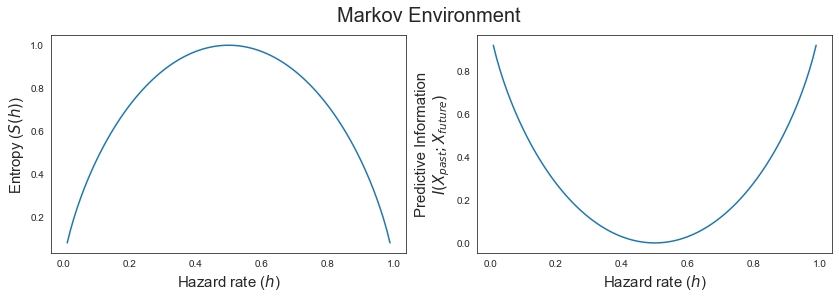

In [24]:
# For now, to run this code, run the cell at the end of the notebook to load the libraries and functions required
#Plot entropy and predictive information for markov and hidden markov environments
hspace = np.linspace(.01,.99,99)
sh = np.array([hEntropy(h,1) for h in hspace])

plt.figure(1,(14,4))
plt.subplot(1,2,1)
plt.plot(hspace,sh)
plt.ylabel('Entropy ($S(h)$)',size=15)
plt.xlabel('Hazard rate ($h$)',size=15)

plt.subplot(1,2,2)
plt.plot(hspace,1-sh)
plt.ylabel('Predictive Information\n$I(X_{past};X_{future})$',size=15)
plt.xlabel('Hazard rate ($h$)',size=15)
plt.suptitle('Markov Environment',size=20)

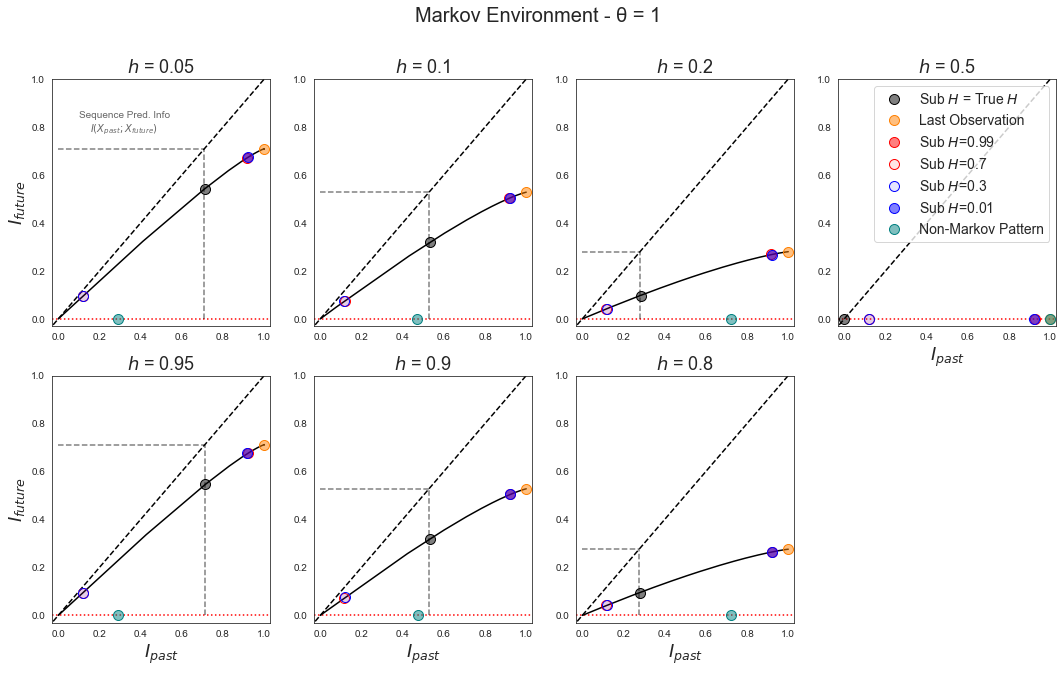

In [22]:
# Plot information bottleneck bound for markov environment and different agents
plt.figure(2,(18,10))
mkov_sims = genSims(100000,1)
pltSims(mkov_sims,'Markov Environment - θ = 1')

#### 3.1) Hidden Markov environments

Now lets look at an environment in which there is a latent variable. Here, instead of there being a perfect correspondence between the state and the observed variable, there is an emission probability $\theta$ that is smaller than 1. Now the agent needs to infer the latent state in order to make its predictions.

This emission probability effectively compresses the information provided by $h$

$$\hat{h}=\theta h + (1-\theta)(1-h)$$

where $\hat{h}$ denotes our compression. The predictive information of this hidden Markov sequences now becomes

$$I(X_{t-1};X_t)=1-S(\hat{h})$$

Below is a plot of how the entropy and predictive information are affected by different values of $\theta$

Text(0.5, 0.98, 'Hidden Markov Environment')

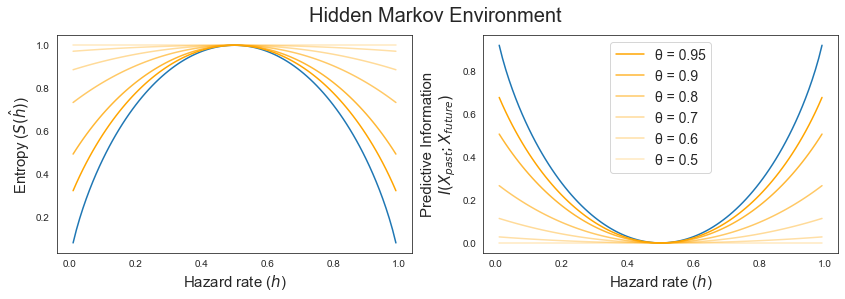

In [41]:
# Plot 
hspace = np.linspace(.01,.99,99)
shats = {}
for theta in [.95,.9,.8,.7,.6,.5]:
    shats[theta]=np.array([hEntropy(h,theta) for h in hspace])

plt.figure(2,(14,4))
plt.subplot(1,2,1)
plt.plot(hspace,sh)
alphas = [1,.8,.6,.4,.35,.25]
for i,key in enumerate(shats.keys()):
    plt.plot(hspace,shats[key],color='orange',alpha=alphas[i])
plt.ylabel('Entropy ($S(\hat{h})$)',size=15)
plt.xlabel('Hazard rate ($h$)',size=15)

plt.subplot(1,2,2)
plt.plot(hspace,1-sh)
for i,key in enumerate(shats.keys()):
    plt.plot(hspace,1-shats[key],color='orange',alpha=alphas[i],label='θ = '+str(key))
plt.ylabel('Predictive Information\n$I(X_{past};X_{future})$',size=15)
plt.xlabel('Hazard rate ($h$)',size=15)
plt.legend(fontsize = 14)
plt.suptitle('Hidden Markov Environment',size=20)

In [ ]:
#Same agents as above with value of theta equal to .8
plt.figure(2,(18,10))
hmkov_sims = genSims(100000,.8)
pltSims(hmkov_sims,'Hidden Markov Environment - θ = 0.8')

Here'a closer look at the bottom part of the axes, where most of the points lie.

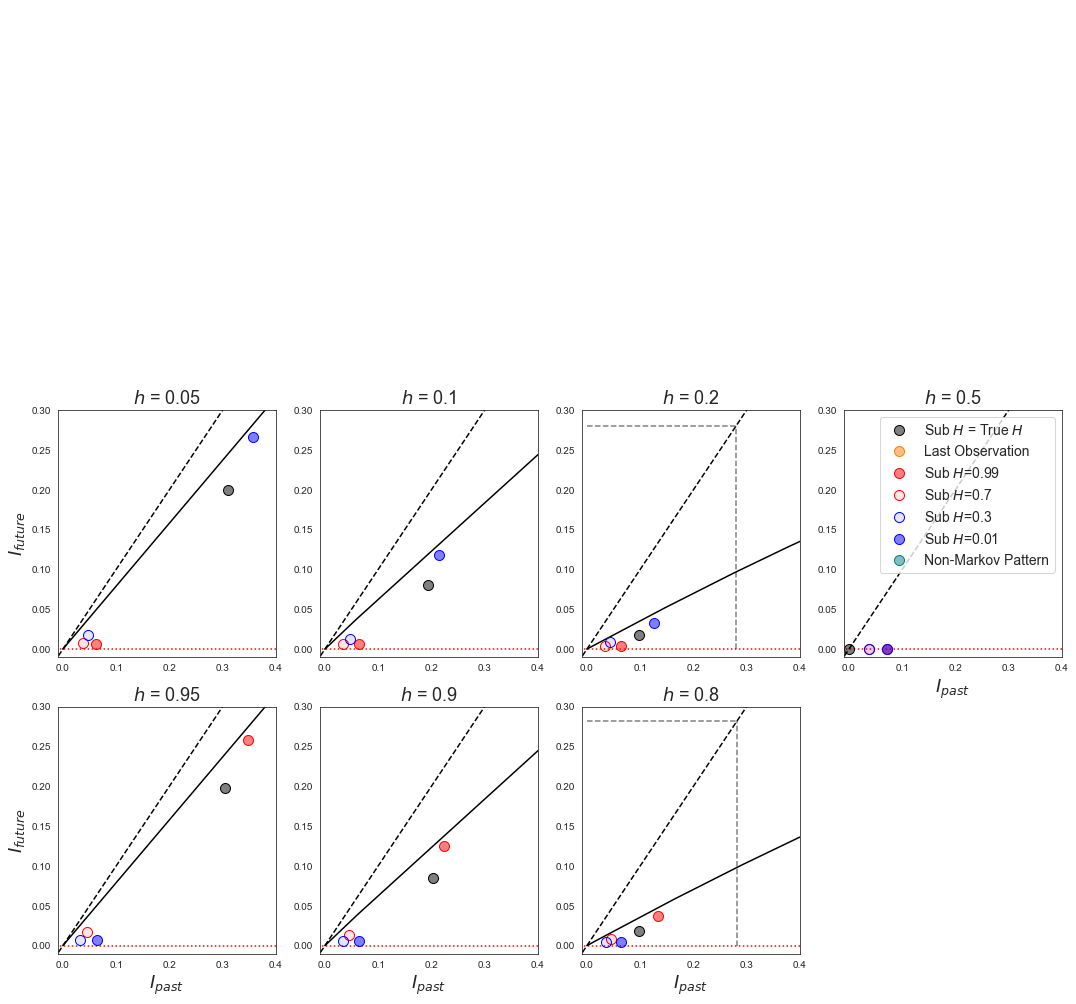

In [16]:
plt.figure(3,(18,10))
pltSims(hmkov_sims,'Hidden Markov Environment - θ = 0.8',yl=(-0.01,.3),xl=(-.01,.4))

In [21]:
import numpy as np
from embo import EmpiricalBottleneck
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

#Utility functions
#Load data and helper functions
def get_marginal(x):
    """
    Helper function to compute and return marginal probability distribution for a 1d vector (x)
    """
    px = np.array([np.sum(x==xi) for xi in np.sort(np.unique(x))])/len(x)
    return(px)

def get_joint(x, y):
    """
    Computes joint probability distribution between 1d vectors x and y (assumes x and y are the same length)
    """
    #  set up dictionary for joint distribution (x-->y-->freq)
    joint_x_y = {}
    
    for x_un in np.unique(x):
        joint_x_y[x_un] = dict(zip(np.unique(y), np.zeros(len(np.unique(y)))))
        
#    populate dictionary 
    for trial, x_val in enumerate(x):
        y_val = y[trial]
        joint_x_y[x_val][y_val] += 1
        
#   normalize to make distirbution 
    # Weird function that calculates the sum of all of the elements in a dictionary
    joint_sum = sum(sum(list(c.values())) for c in list(joint_x_y.values()))
    
    # Normalize - probably a better way of doing this with matrices
    for key1 in joint_x_y:
        for key2 in joint_x_y[key1]:
            joint_x_y[key1][key2] /= joint_sum
            
    return(joint_x_y)

def mutual_inf(x, y):
    """
    Calculates and returns the mutual information I(x;y)
    Assuming x,y are both [n x 1] dimensional
    """  
#     Calculate marginal distributions
    px = get_marginal(x)
    py = get_marginal(y)
    
    
    joint_x_y = get_joint(x,y)
# calculate mutual information
    mi = 0
    
    for n_x, x_un in enumerate(np.unique(x)):
        pxi = px[n_x] # p(x)
        
        for n_y, y_un in enumerate(np.unique(y)):
            pyi = py[n_y] # p(y)            
            
            joint_i = joint_x_y[x_un][y_un] # P(x,y)
            
            if ((pxi == 0) or (pyi == 0) or (joint_i ==0 )):
                continue
            else:
                mi += joint_i * np.log2(joint_i/(pxi*pyi))
                
    return mi

def deltaBound(ib_ipast,ib_ifuture,p_ipast,p_ifuture):
    ''' Function to calculate distance from the bound between an empirical IB and participant predictive info
    ib_ipast: ipast of empirical IB (x of convex hull)
    ib_ifuture: ifuture of empirical IB (y of convex hull)
    p_ipast: participant ipast (uncorrected)
    p_ifuture: participant ifuture (uncorrected)
    
    Returns participant ifuture minus the empirical bound (more negative = farther away from the bound)
    '''
    ind = np.argwhere(np.array(ib_ipast) > p_ipast)[0][0]
    slp = (ib_ifuture[ind]-ib_ifuture[ind-1])/(ib_ipast[ind]-ib_ipast[ind-1])
    intercept = ib_ifuture[ind]-(slp*ib_ipast[ind])
    #Return distance between participant Ifuture and interpolated bound - higher 
    return p_ifuture - ((p_ipast*slp)+intercept)
import numpy as np


def genMarkovObs(n,p,h):
    '''
    General purpose function to generate markov observations. Generates samples x from state z with transition probabilities h
    INPUT:
        n: number of desired observations
        p: bernoulli probability that sample from z will be the same as z
        h: transition probability of z for successive trials
    OUTPUT:
        z: sampled sources
        x: sampled observations
    '''
    z = np.zeros(n)-1
    x = np.zeros(n)-1
    zs = np.array([0,1])
    currZ = np.random.choice(zs)
    for i in np.arange(n):
        
        # Apply transition probability
        if np.random.uniform() < h:
            currZ = zs[zs!=currZ]
        z[i] = currZ
        
        # Generate sample
        if np.random.uniform() < p:
            x[i] = currZ
        else:
            x[i] = zs[zs!=currZ]
    
    return(z,x)

def getMarkovFeat(z,x):
    '''
    Function to convert observations and sources into features
    INPUT:
        z: 1 x n vector of trial by trial sources
        x: 1 x n vector of trial by trial observations
    OUTPUT:
        feat: 1 x n vector of trial by trial features
    '''
    base = np.array([2,2])**np.array([0,1])
    return(np.array([np.sum(base*np.array([z[i],x[i]])) for i in np.arange(len(z))]))

def getMarkovEstimator(x,p,h):
    '''
    Function to generate responses from a model attempting to estimate state
    INPUT:
        x: 1 x n sequence of observations
        p: internal estimate of Bernoulli probability between z and x
        h: internal estimate of transition probability
    OUTPUT:
        prior_resp: model's prediction of the state z using prior prob
    '''
    prior_resp = np.zeros(len(x))-1
    z_est = np.array([.5,.5])
    liks = np.array([[p,1-p],[1-p,p]])
    for i,xi in enumerate(x):
        
        #Apply hazard to prior
        z0 = z_est[0].copy()
        z1 = z_est[1].copy()
        z_est[0] = z0*(1-h) + z1*h
        z_est[1] = z1*(1-h) + z0*h
        
        #Make prediction about the source (prior to seeing observation)
        prior_resp[i] = int(np.random.uniform()<z_est[1])
        
        # Update after seeing observation
        z_est = z_est*liks[int(xi)]
        z_est /= np.sum(z_est)    
        
    return(prior_resp)

def getPatternEstimator(x):
    '''
    Function to generate responses from model that uses info from 2 trials back to make its responses
    '''
    prior_resp = np.zeros(len(x))-1
    for i in np.arange(len(x)):
        if i < 2:
            r = np.random.choice([0,1])
        else:
            r = int(x[i-2] == x[i-1])
        prior_resp[i] = r
    
    post_resp = prior_resp.copy() #figure this out later
    return(prior_resp,post_resp)

def genSims(n,p):
    mkov_sims = {}
    
    # Hazard rates to be considered
    h_ex = [0.05,0.1,0.2,0.5,0.95,0.9,0.8]
    for i,h in enumerate(h_ex):

        # Dictionaries to save input
        mkov_sims[h] = {}

        # Generate observations
        z,x = genMarkovObs(n,p,h)

        # Convert to features
        feat = getMarkovFeat(z,x)
        feat_patt = getMarkovFeat(x[:-1],x[1:])

        # Get empirical bottleneck values for simulations with each value of H
        eib_ip,eib_if,betas = EmpiricalBottleneck(feat[:-1],z[1:],processes=8,maxbeta=50,numbeta=500).get_empirical_bottleneck()
        mkov_sims[h]['eib_ipast'] = eib_ip
        mkov_sims[h]['eib_ifuture'] = eib_if
        mkov_sims[h]['bound'] = mutual_inf(feat[:-1],z[1:])

        # Get responses
        #Ideal observer
        prior_ideal= getMarkovEstimator(x,p,h)
        
        #Simple model (repeat previous state)
        prior_simple = np.concatenate((np.array([np.random.choice([0,1])]),x[:-1]),axis=None)
        post_simple = x.copy()

        #Overestimator
        prior_over= getMarkovEstimator(x,p,.99)

        #Underestimator
        prior_under = getMarkovEstimator(x,p,0.01)
        
        # A little more random but subjective H a little >.5
        prior_random1 = getMarkovEstimator(x,p,.7)
        
        # A little more random but subjective H a little <.5
        prior_random2 = getMarkovEstimator(x,p,.3)
        
        #Pattern estimator - model that encodes info but doesn't use it properly
        prior_patt, post_patt = getPatternEstimator(x)

        #List of responses from ideal, simple, underestimator, overestimator, and pattern
        resps = [prior_ideal,prior_simple,prior_over,prior_under,prior_random1,prior_random2,prior_patt]

        #Save simulation predictive information
        models = ['ideal','simple','over','under','random1','random2','pattern']
        for j,mod in enumerate(models):
            r = resps[j]
            if mod == 'pattern':
                mkov_sims[h][mod+'_ipast'] = mutual_inf(feat_patt[:-1],r[2:])
            else:
                mkov_sims[h][mod+'_ipast'] = mutual_inf(feat[:-1],r[1:])
            mkov_sims[h][mod+'_ifuture'] = mutual_inf(r,z)
          
    return(mkov_sims)

def pltSims(mkov_sims,tit,yl=False,xl=False):
    '''
    Function to plot results for a few different transition probability values
    '''
    for i,key in enumerate(mkov_sims.keys()):
        plt.subplot(2,4,i+1)
        plt.plot([-.05,1.05], [0,0],':r')
        plt.plot([-.05,1.05], [-.05,1.05],'--k')
        plt.plot([mkov_sims[key]['bound'],mkov_sims[key]['bound']],[0,mkov_sims[key]['bound']],'--k',alpha=.5)
        plt.plot([0,mkov_sims[key]['bound']],[mkov_sims[key]['bound'],mkov_sims[key]['bound']],'--k',alpha=.5)
        plt.plot(mkov_sims[key]['eib_ipast'],mkov_sims[key]['eib_ifuture'],'-k')
        
        models = ['ideal','simple','over','random1','random2','under','pattern']
        lab = ['Sub $H$ = True $H$','Last Observation','Sub $H$=0.99','Sub $H$=0.7','Sub $H$=0.3','Sub $H$=0.01','Non-Markov Pattern']
        cmap = plt.get_cmap("tab10")
        blue = (0,0,1,1)
        red = (1,0,0,1)
        black = (0,0,0,1)
        orange = (1,.5,0,1)
        green = (0,.5,.5,1)
        cmap = [black,orange,red,red,blue,blue,green]
        ap = [.5,.5,.5,.1,.1,.5,.5]
        for i2,mod in enumerate(models):
            col = list(cmap[i2])
            col[3] = ap[i2]
            col = tuple(col)
            plt.plot(mkov_sims[key][mod+'_ipast'],mkov_sims[key][mod+'_ifuture'],'o',label=lab[i2],mfc=col,mec = cmap[i2],ms=10,mew=1)
        plt.title('$h$ = %s'%str(key),size=18)
        plt.ylim([-.03,1])
        plt.xlim([-.03,1.03])
        if i in [0,4]:
            plt.ylabel('$I_{future}$',size=18)
        if i > 2:
            plt.xlabel('$I_{past}$',size=18)
        if i == 3:
            plt.legend(fontsize=14)
        if i == 0:
            plt.annotate('Sequence Pred. Info\n$I(X_{past};X_{future})$',(.1,.78),alpha=.7,ma='center')
        if yl != False:
            plt.ylim(yl)
        if xl != False:
            plt.xlim(xl)
        plt.suptitle(tit,size=20)
            
def hEntropy(h,p):
    '''
    Compute entropy for different hazard rates and emission probabilites (p)
    '''
    hprime = p*h + (1-p)*(1-h)
    sh = -hprime*np.log2(hprime)-(1-hprime)*np.log2(1-hprime)
    return(sh)